In [ ]:
#Step 0. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import tensorflow as tf

In [ ]:
#Step 1. Load Data
df_raw = pd.read_excel("/content/Concrete_Data.xls")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
#Step 2. Preprocessing
df_baking = df_raw.copy()
columns = [
    "cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
    "coarse_aggregate", "fine_aggregate", "age(day)", "concrete_compressive_strength"
    ]
df_baking.columns = columns
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age(day)                       1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.sample(10, random_state = 2025)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age(day),concrete_compressive_strength
565,295.80,0.00,0.00,185.70,0.00,1091.4,769.30,7,14.843729
690,288.00,192.00,0.00,192.00,0.00,932.0,717.80,7,23.523542
636,300.00,0.00,0.00,184.00,0.00,1075.0,795.00,28,26.848195
43,380.00,0.00,0.00,228.00,0.00,932.0,670.00,180,53.104131
720,203.50,305.30,0.00,203.50,0.00,963.4,630.00,90,51.863764
346,213.74,0.00,174.74,154.79,10.16,1053.5,776.35,28,40.148187
149,425.00,106.30,0.00,153.50,16.50,852.1,887.10,56,64.300532
376,376.00,0.00,0.00,214.60,0.00,1003.5,762.36,28,31.971002
605,236.00,0.00,0.00,194.00,0.00,968.0,885.00,3,6.467285
436,172.38,13.61,172.37,156.76,4.14,1006.3,856.40,28,33.687797


In [ ]:
#Step 4. EDA
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((824, 9), (206, 9))

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,824.0,278.074320,105.202346,102.000000,190.255000,255.000000,350.000000,540.000000
blast_furnace_slag,824.0,76.231311,86.630413,0.000000,0.000000,26.000000,145.000000,359.400000
fly_ash,824.0,53.503083,64.244911,0.000000,0.000000,0.000000,118.270000,200.100000
water,824.0,181.901396,21.936752,121.750000,164.900000,185.700000,193.000000,247.000000
superplasticizer,824.0,6.186624,6.094910,0.000000,0.000000,6.325000,10.300000,32.200000
coarse_aggregate,824.0,971.264211,77.333406,801.000000,932.000000,968.000000,1028.400000,1134.300000
fine_aggregate,824.0,773.822100,80.960805,594.000000,729.750000,779.510000,825.125000,992.600000
age(day),824.0,46.007282,63.292854,1.000000,12.250000,28.000000,56.000000,365.000000
concrete_compressive_strength,824.0,35.512051,16.683885,2.331808,23.728144,33.729166,45.367521,82.599225


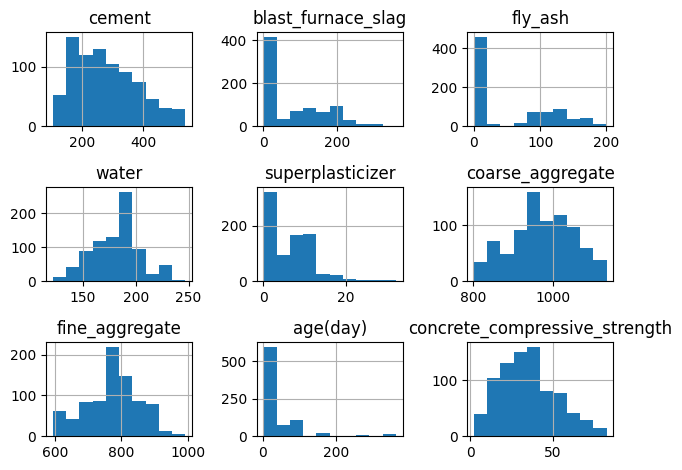

In [ ]:
df_train.hist()
plt.tight_layout()
plt.show()

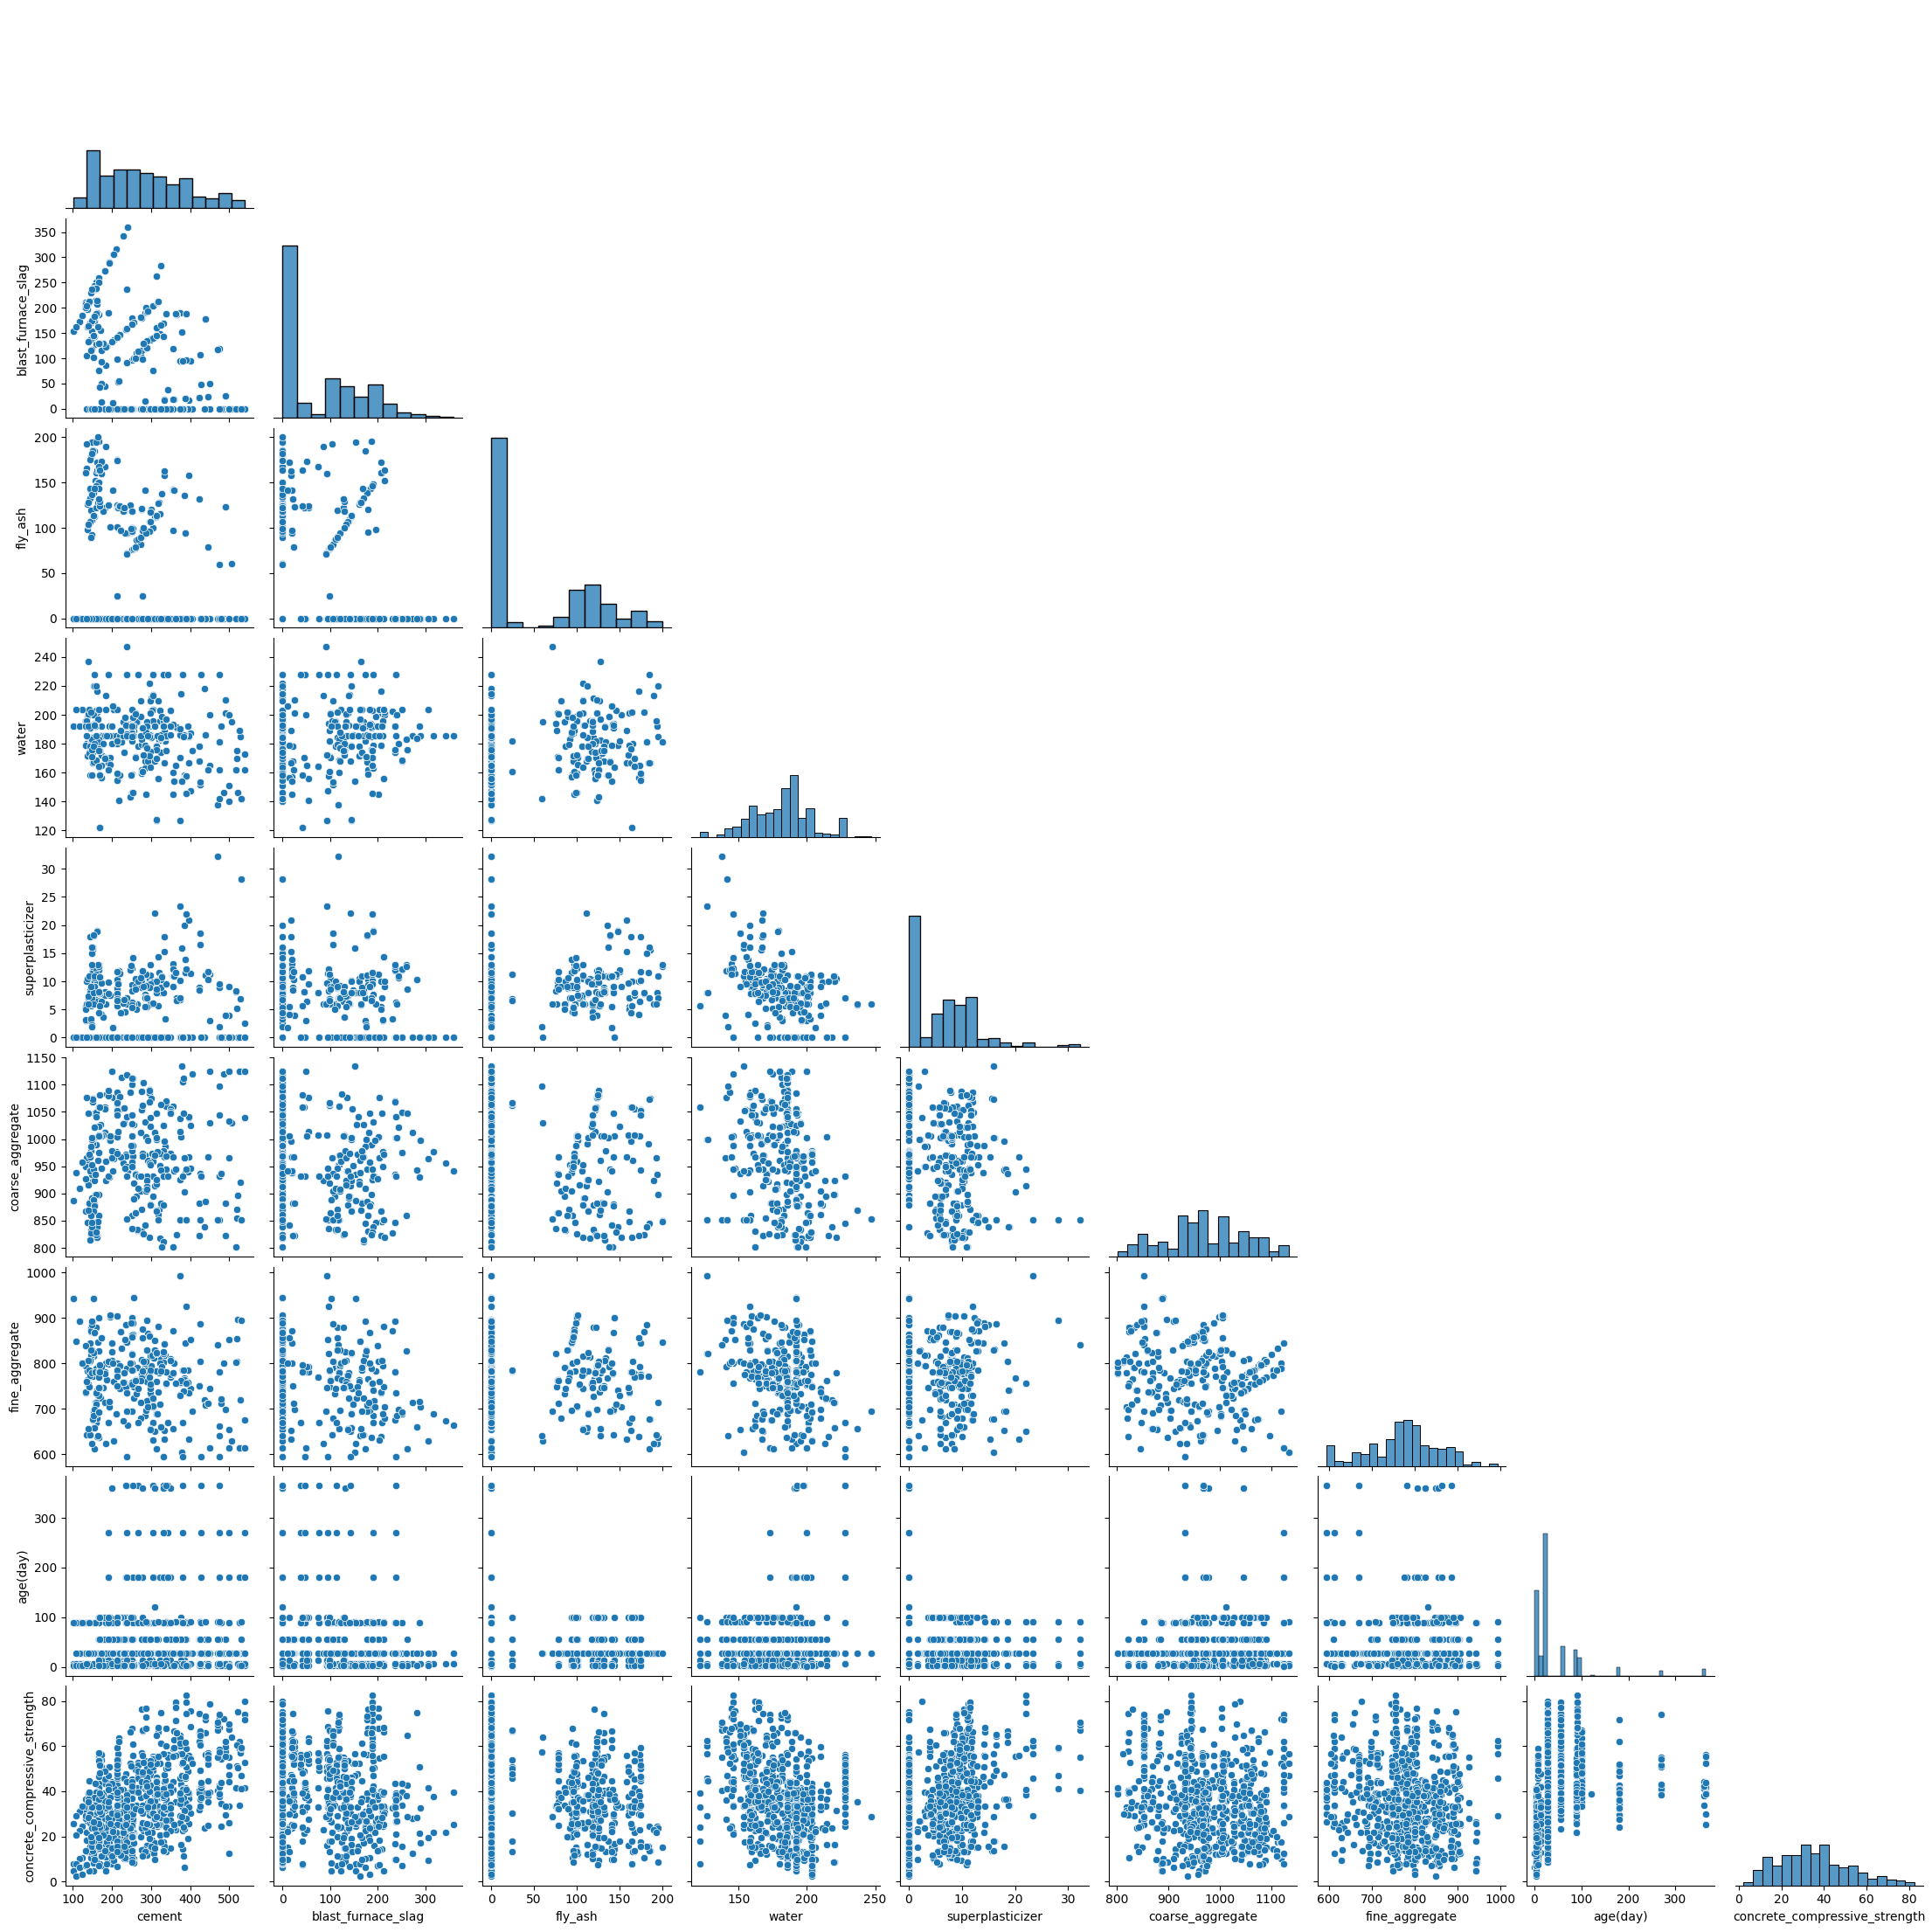

In [ ]:
sns.pairplot(df_train, corner=True)
plt.show()

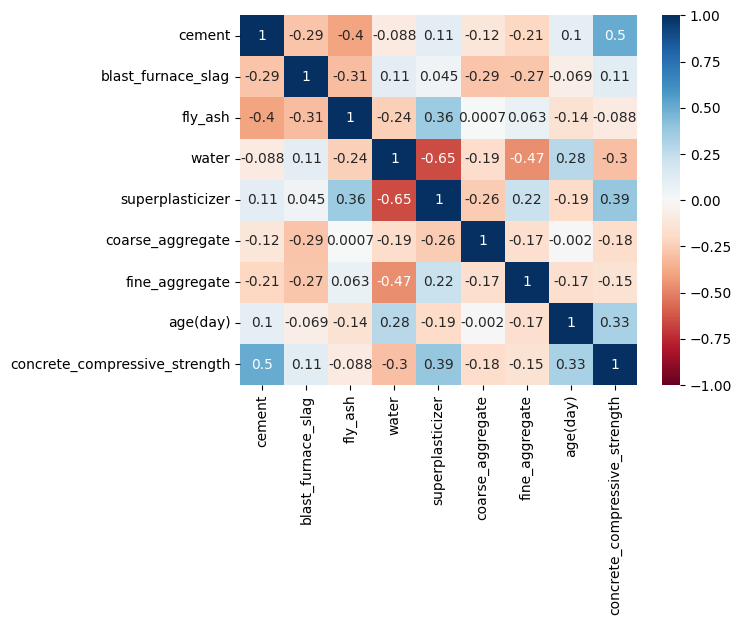

In [ ]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [ ]:
#Step 4. Deep Learning
X_train = df_train.drop(columns=['concrete_compressive_strength'])
y_train = df_train['concrete_compressive_strength']

X_test = df_test.drop(columns=['concrete_compressive_strength'])
y_test = df_test['concrete_compressive_strength']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((824, 8), (824,), (206, 8), (206,))

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

type(X_train_sc), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)), #Capa de entrada de datos
    tf.keras.layers.Dense(32, activation='relu'), #Capa de procesamiento
    tf.keras.layers.Dense(16, activation='relu'), #Capa de procesamiento
    tf.keras.layers.Dense(8, activation='relu'), #Capa de procesamiento
    tf.keras.layers.Dense(1) #Capa variable de salida
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

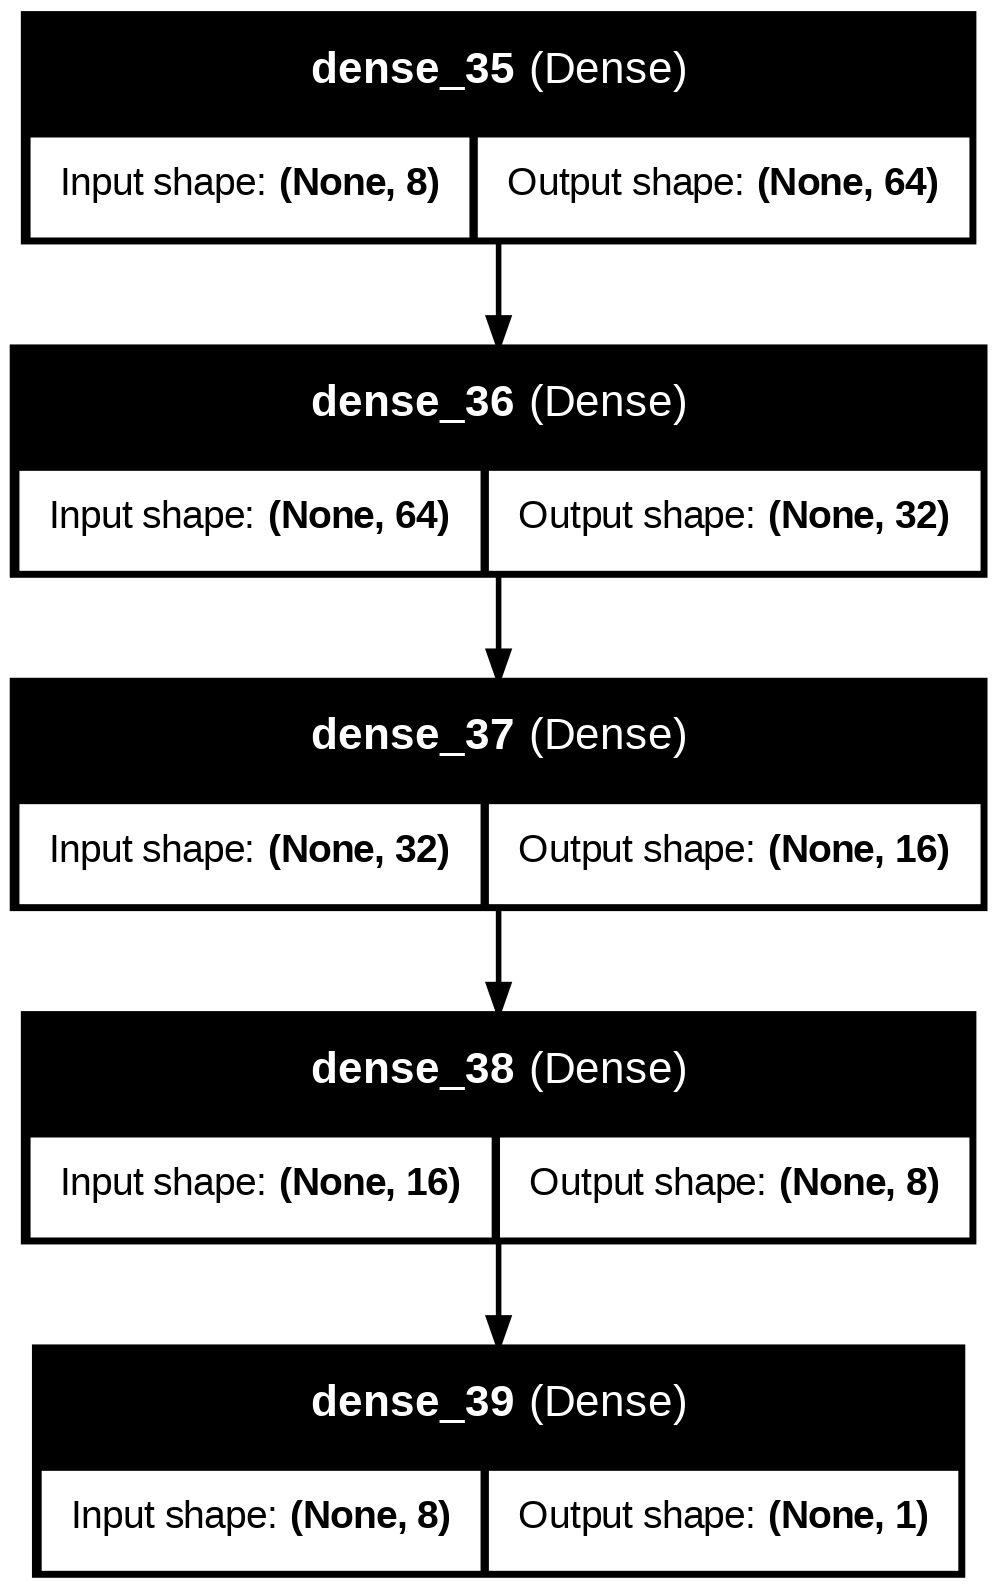

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=["mse"]) #Compilacion del modelo

In [ ]:
history = model.fit(
    X_train_sc, y_train.values,
    epochs=200, batch_size=100,
    validation_split=0.2
    )

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1551.3213 - mse: 1551.3213 - val_loss: 1338.4268 - val_mse: 1338.4268
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1509.5370 - mse: 1509.5370 - val_loss: 1305.8875 - val_mse: 1305.8875
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1482.9867 - mse: 1482.9867 - val_loss: 1263.8829 - val_mse: 1263.8829
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1380.6708 - mse: 1380.6708 - val_loss: 1209.8849 - val_mse: 1209.8849
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1344.0992 - mse: 1344.0992 - val_loss: 1139.0347 - val_mse: 1139.0347
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1259.2472 - mse: 1259.2472 - val_loss: 1046.9557 - val_mse: 1046.9557
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1086.6885 - mse: 1086.6885 - val_loss: 927.9929 - val_mse: 927.9929
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1002.1546 - mse: 1002.1546 - val_loss: 777.9564 

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']

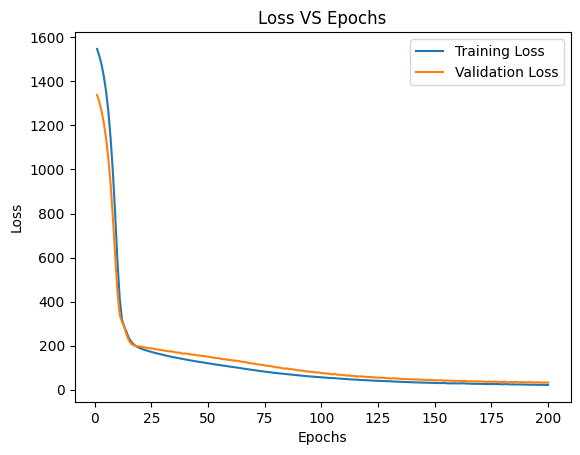

In [ ]:
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Loss VS Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

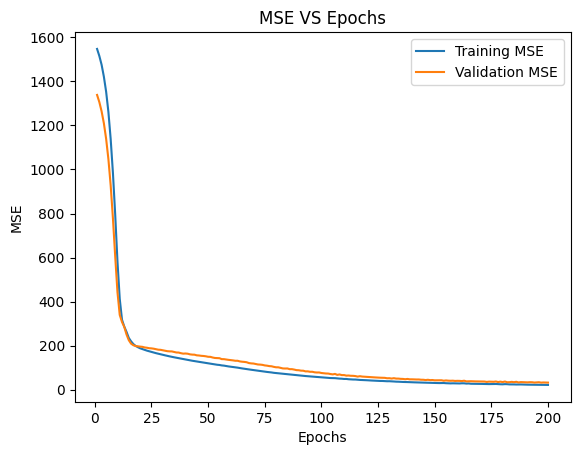

In [ ]:
plt.plot(epochs, mse, label="Training MSE")
plt.plot(epochs, val_mse, label="Validation MSE")
plt.title("MSE VS Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [ ]:
loss, mse = model.evaluate(X_test_sc, y_test.values)
print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {np.sqrt(mse):.2f}")

#Cuando es regresion el mse esta por debajo del val_mse, significa que esta sobreajustando y hay "Overfitting"

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.6878 - mse: 35.6878 
Test MSE: 36.20
Test RMSE: 6.02


--------------------

# Redes neuronales para datos classifier

In [ ]:
url = 'https://raw.githubusercontent.com/selva86/' + \
'datasets/master/orange_juice_withmissing.csv'

In [ ]:
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [ ]:
df_raw.sample(10, random_state=2025)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
282,MM,247,3.0,1.99,2.23,0.0,0.0,0.0,0.0,0.003689,2.23,1.99,0.24,No,0.000000,0.0,0.24,3.0
786,MM,234,3.0,1.79,2.09,0.0,0.0,0.0,0.0,0.067109,2.09,1.79,0.30,No,0.000000,0.0,0.30,3.0
826,CH,244,4.0,1.99,2.23,0.0,0.0,0.0,0.0,0.914906,2.23,1.99,0.24,No,0.000000,0.0,0.24,4.0
465,CH,267,7.0,1.86,2.13,0.0,0.0,1.0,0.0,0.787008,2.13,1.86,0.27,Yes,0.000000,0.0,0.27,0.0
256,CH,232,7.0,1.69,1.99,0.0,0.4,1.0,1.0,0.331072,1.59,1.69,-0.10,Yes,0.201005,0.0,0.30,0.0
412,MM,234,7.0,1.75,1.99,0.0,0.4,1.0,0.0,0.227109,1.59,1.75,-0.16,Yes,0.201005,0.0,0.24,0.0
14,CH,278,7.0,2.06,2.13,0.0,0.0,0.0,0.0,0.744000,2.13,2.06,0.07,Yes,0.000000,0.0,0.07,0.0
754,MM,241,1.0,1.86,1.99,0.0,0.3,0.0,1.0,0.364800,1.69,1.86,-0.17,No,0.150754,0.0,0.13,1.0
273,MM,229,3.0,1.79,1.79,0.0,0.0,0.0,0.0,0.027488,1.79,1.79,0.00,No,0.000000,0.0,0.00,3.0
294,MM,275,2.0,1.96,NaN,0.0,0.8,0.0,1.0,0.000254,1.38,1.96,-0.58,No,0.366972,0.0,0.22,2.0


In [ ]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.drop(columns=["weekofpurchase","pctdiscch","pctdiscmm","pricediff","listpricediff"])
df_baking = df_baking.astype({
    "purchase":"category",
    "storeid":"category",
    "store7":"category",
    "specialch":"category",
    "specialmm":"category"
    })

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   purchase     1070 non-null   category
 1   storeid      1069 non-null   category
 2   pricech      1069 non-null   float64 
 3   pricemm      1066 non-null   float64 
 4   discch       1068 non-null   float64 
 5   discmm       1066 non-null   float64 
 6   specialch    1068 non-null   category
 7   specialmm    1065 non-null   category
 8   loyalch      1065 non-null   float64 
 9   salepricemm  1065 non-null   float64 
 10  salepricech  1069 non-null   float64 
 11  store7       1070 non-null   category
 12  store        1068 non-null   float64 
dtypes: category(5), float64(8)
memory usage: 72.9 KB


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.sample(10, random_state=2025)

,purchase,storeid,pricech,pricemm,discch,discmm,specialch,specialmm,loyalch,salepricemm,salepricech,store7,store
581,MM,1.0,1.75,1.99,0.0,0.30,0.0,1.0,0.500000,1.69,1.75,No,1.0
571,CH,2.0,1.99,2.18,0.0,0.00,0.0,0.0,0.600000,2.18,1.99,No,2.0
902,CH,1.0,1.96,2.13,0.0,0.74,0.0,1.0,0.664742,1.39,1.96,No,1.0
576,MM,7.0,1.75,1.99,0.0,0.40,0.0,0.0,0.095630,1.59,1.75,Yes,0.0
109,CH,7.0,1.86,2.18,0.0,0.00,0.0,0.0,0.744000,2.18,1.86,Yes,0.0
501,MM,2.0,1.89,2.09,0.0,0.00,0.0,0.0,0.204800,2.09,1.89,No,2.0
511,CH,4.0,1.99,2.23,0.0,0.00,0.0,0.0,0.600000,2.23,1.99,No,4.0
803,MM,1.0,1.96,2.13,0.0,0.74,0.0,1.0,0.863685,1.39,1.96,No,1.0
822,MM,2.0,1.69,1.69,0.0,0.00,0.0,0.0,0.500000,1.69,1.69,No,2.0
851,CH,7.0,2.06,2.13,0.0,0.00,0.0,0.0,0.946313,2.13,2.06,Yes,0.0


In [ ]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category").T)


,count,mean,std,min,25%,50%,75%,max
pricech,962.0,1.869511,0.101984,1.690000,1.790000,1.86,1.990000,2.090000
pricemm,960.0,2.086156,0.134718,1.690000,2.090000,2.09,2.180000,2.290000
discch,961.0,0.052706,0.118173,0.000000,0.000000,0.00,0.000000,0.500000
discmm,959.0,0.121147,0.211912,0.000000,0.000000,0.00,0.200000,0.800000
loyalch,958.0,0.567224,0.308780,0.000011,0.325648,0.60,0.857394,0.999947
salepricemm,958.0,1.965261,0.251647,1.190000,1.690000,2.09,2.180000,2.290000
salepricech,962.0,1.816861,0.143712,1.390000,1.750000,1.86,1.890000,2.090000
store,961.0,1.636837,1.432603,0.000000,0.000000,2.00,3.000000,4.000000


,count,unique,top,freq
purchase,963,2,CH,587
storeid,962.0,5.0,7.0,316.0
specialch,961.0,2.0,0.0,824.0
specialmm,958.0,2.0,0.0,805.0
store7,963,2,No,646


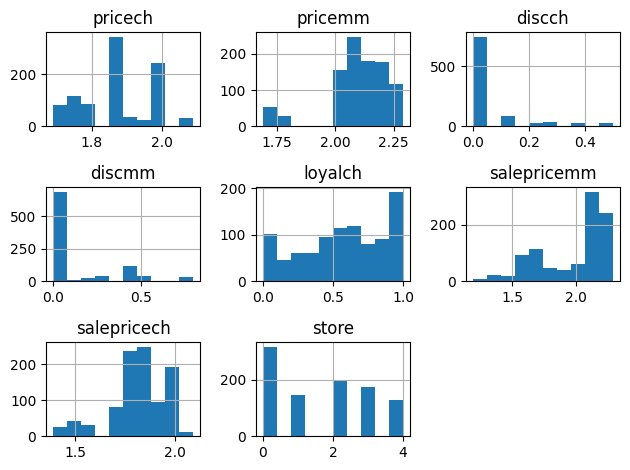

In [ ]:
df_train.hist()
plt.tight_layout()
plt.show()

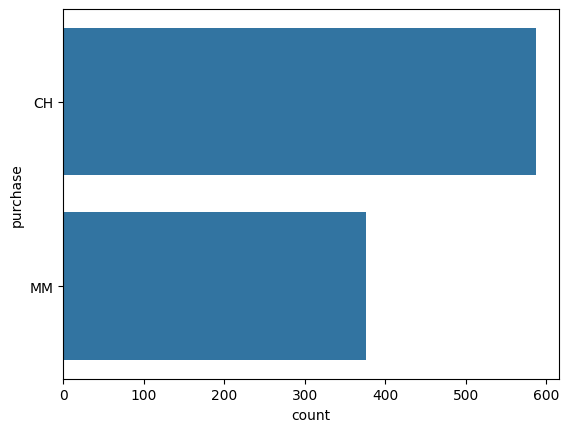

In [ ]:
sns.countplot(df_train, y='purchase')
plt.show()

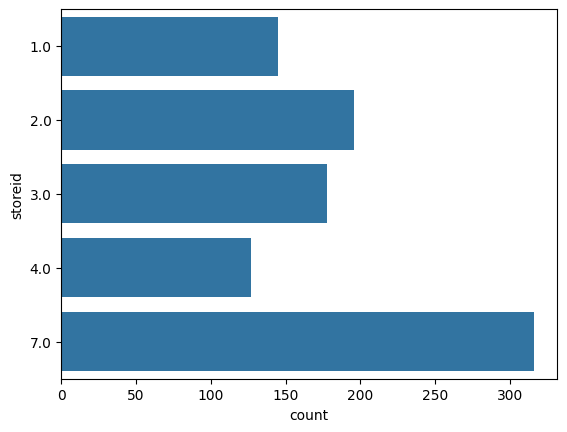

In [ ]:
sns.countplot(df_train, y='storeid')
plt.show()

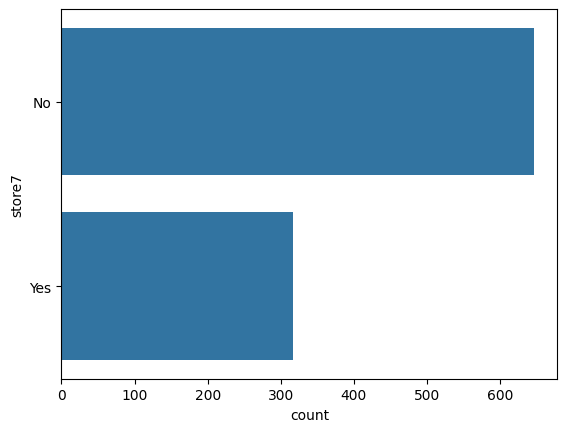

In [ ]:
sns.countplot(df_train, y='store7')
plt.show()

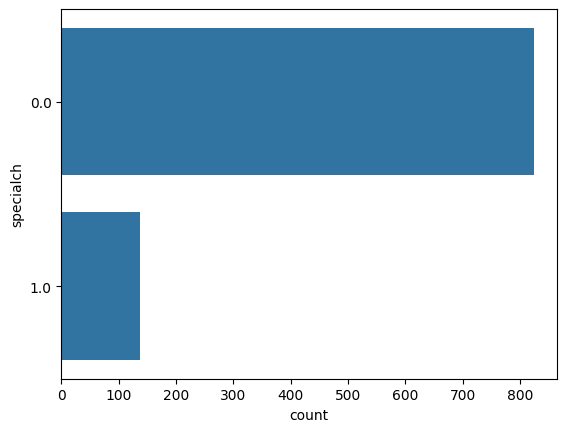

In [ ]:
sns.countplot(df_train, y='specialch')
plt.show()

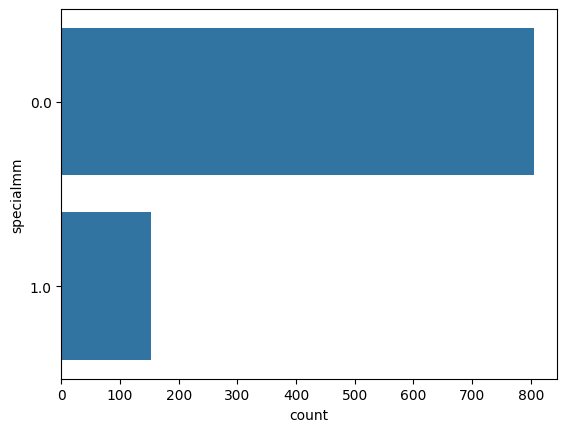

In [ ]:
sns.countplot(df_train, y='specialmm')
plt.show()

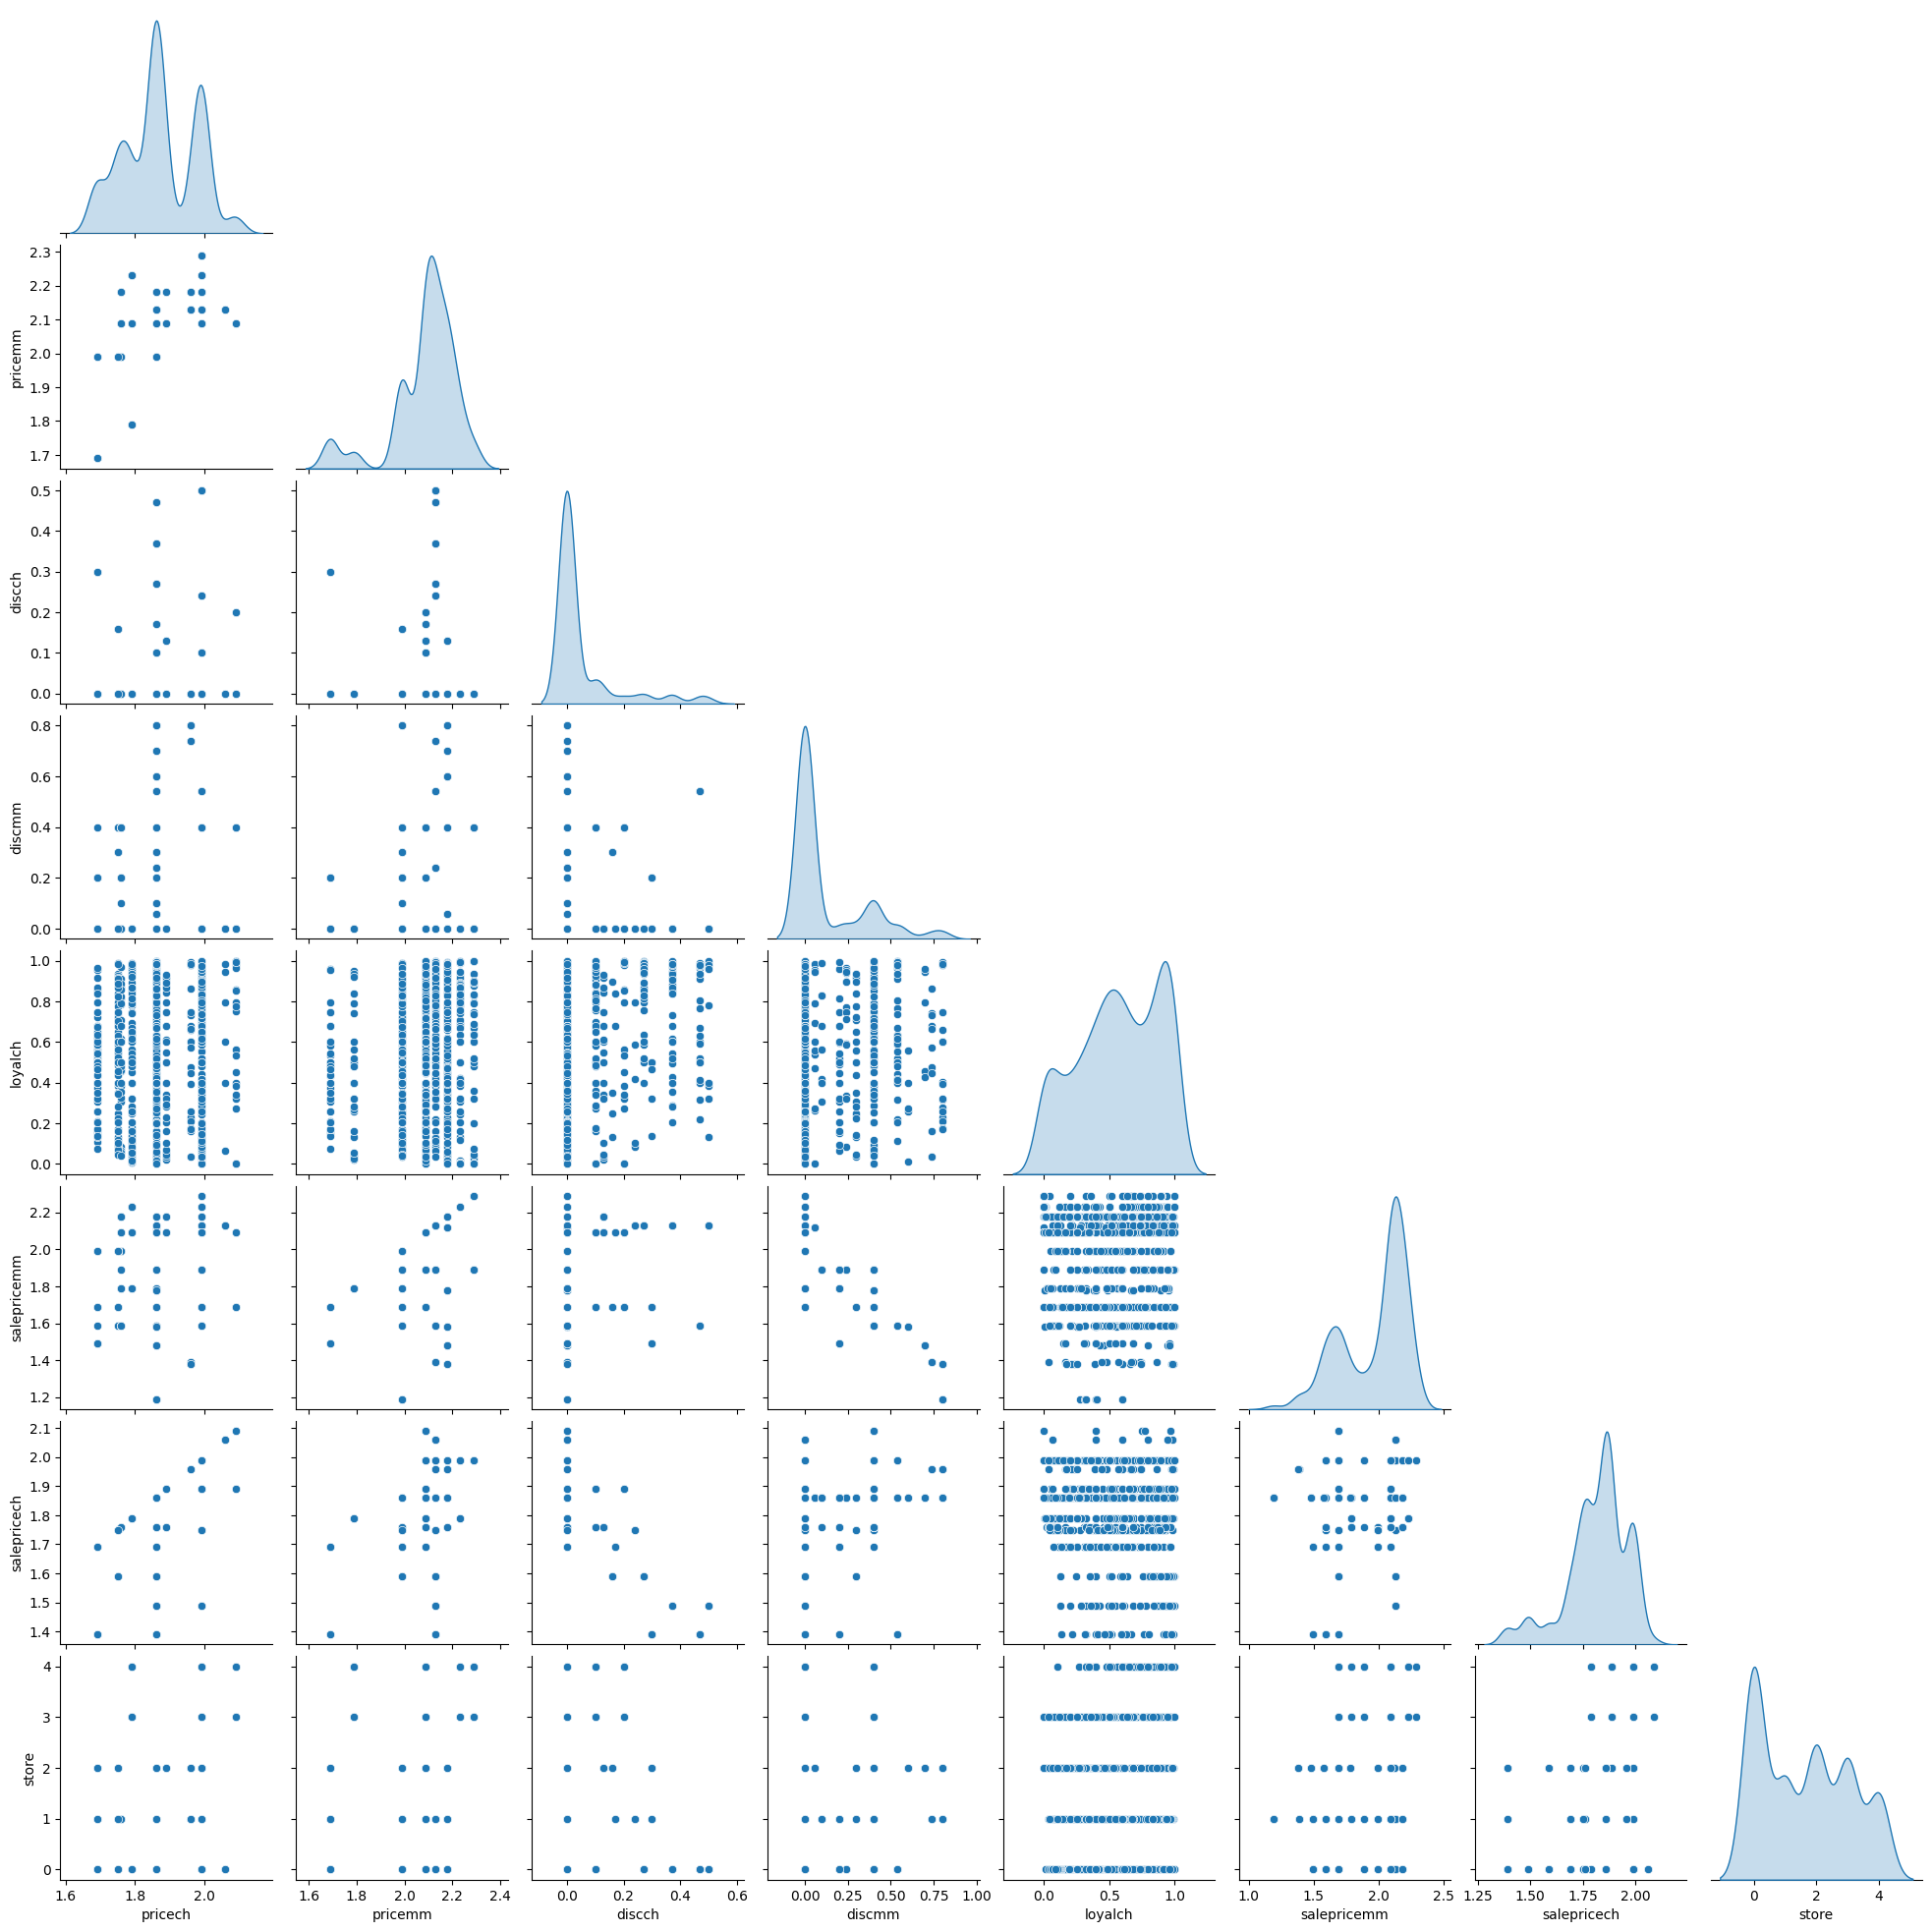

In [ ]:
sns.pairplot(df_train, corner=True, diag_kind='kde')
plt.show()

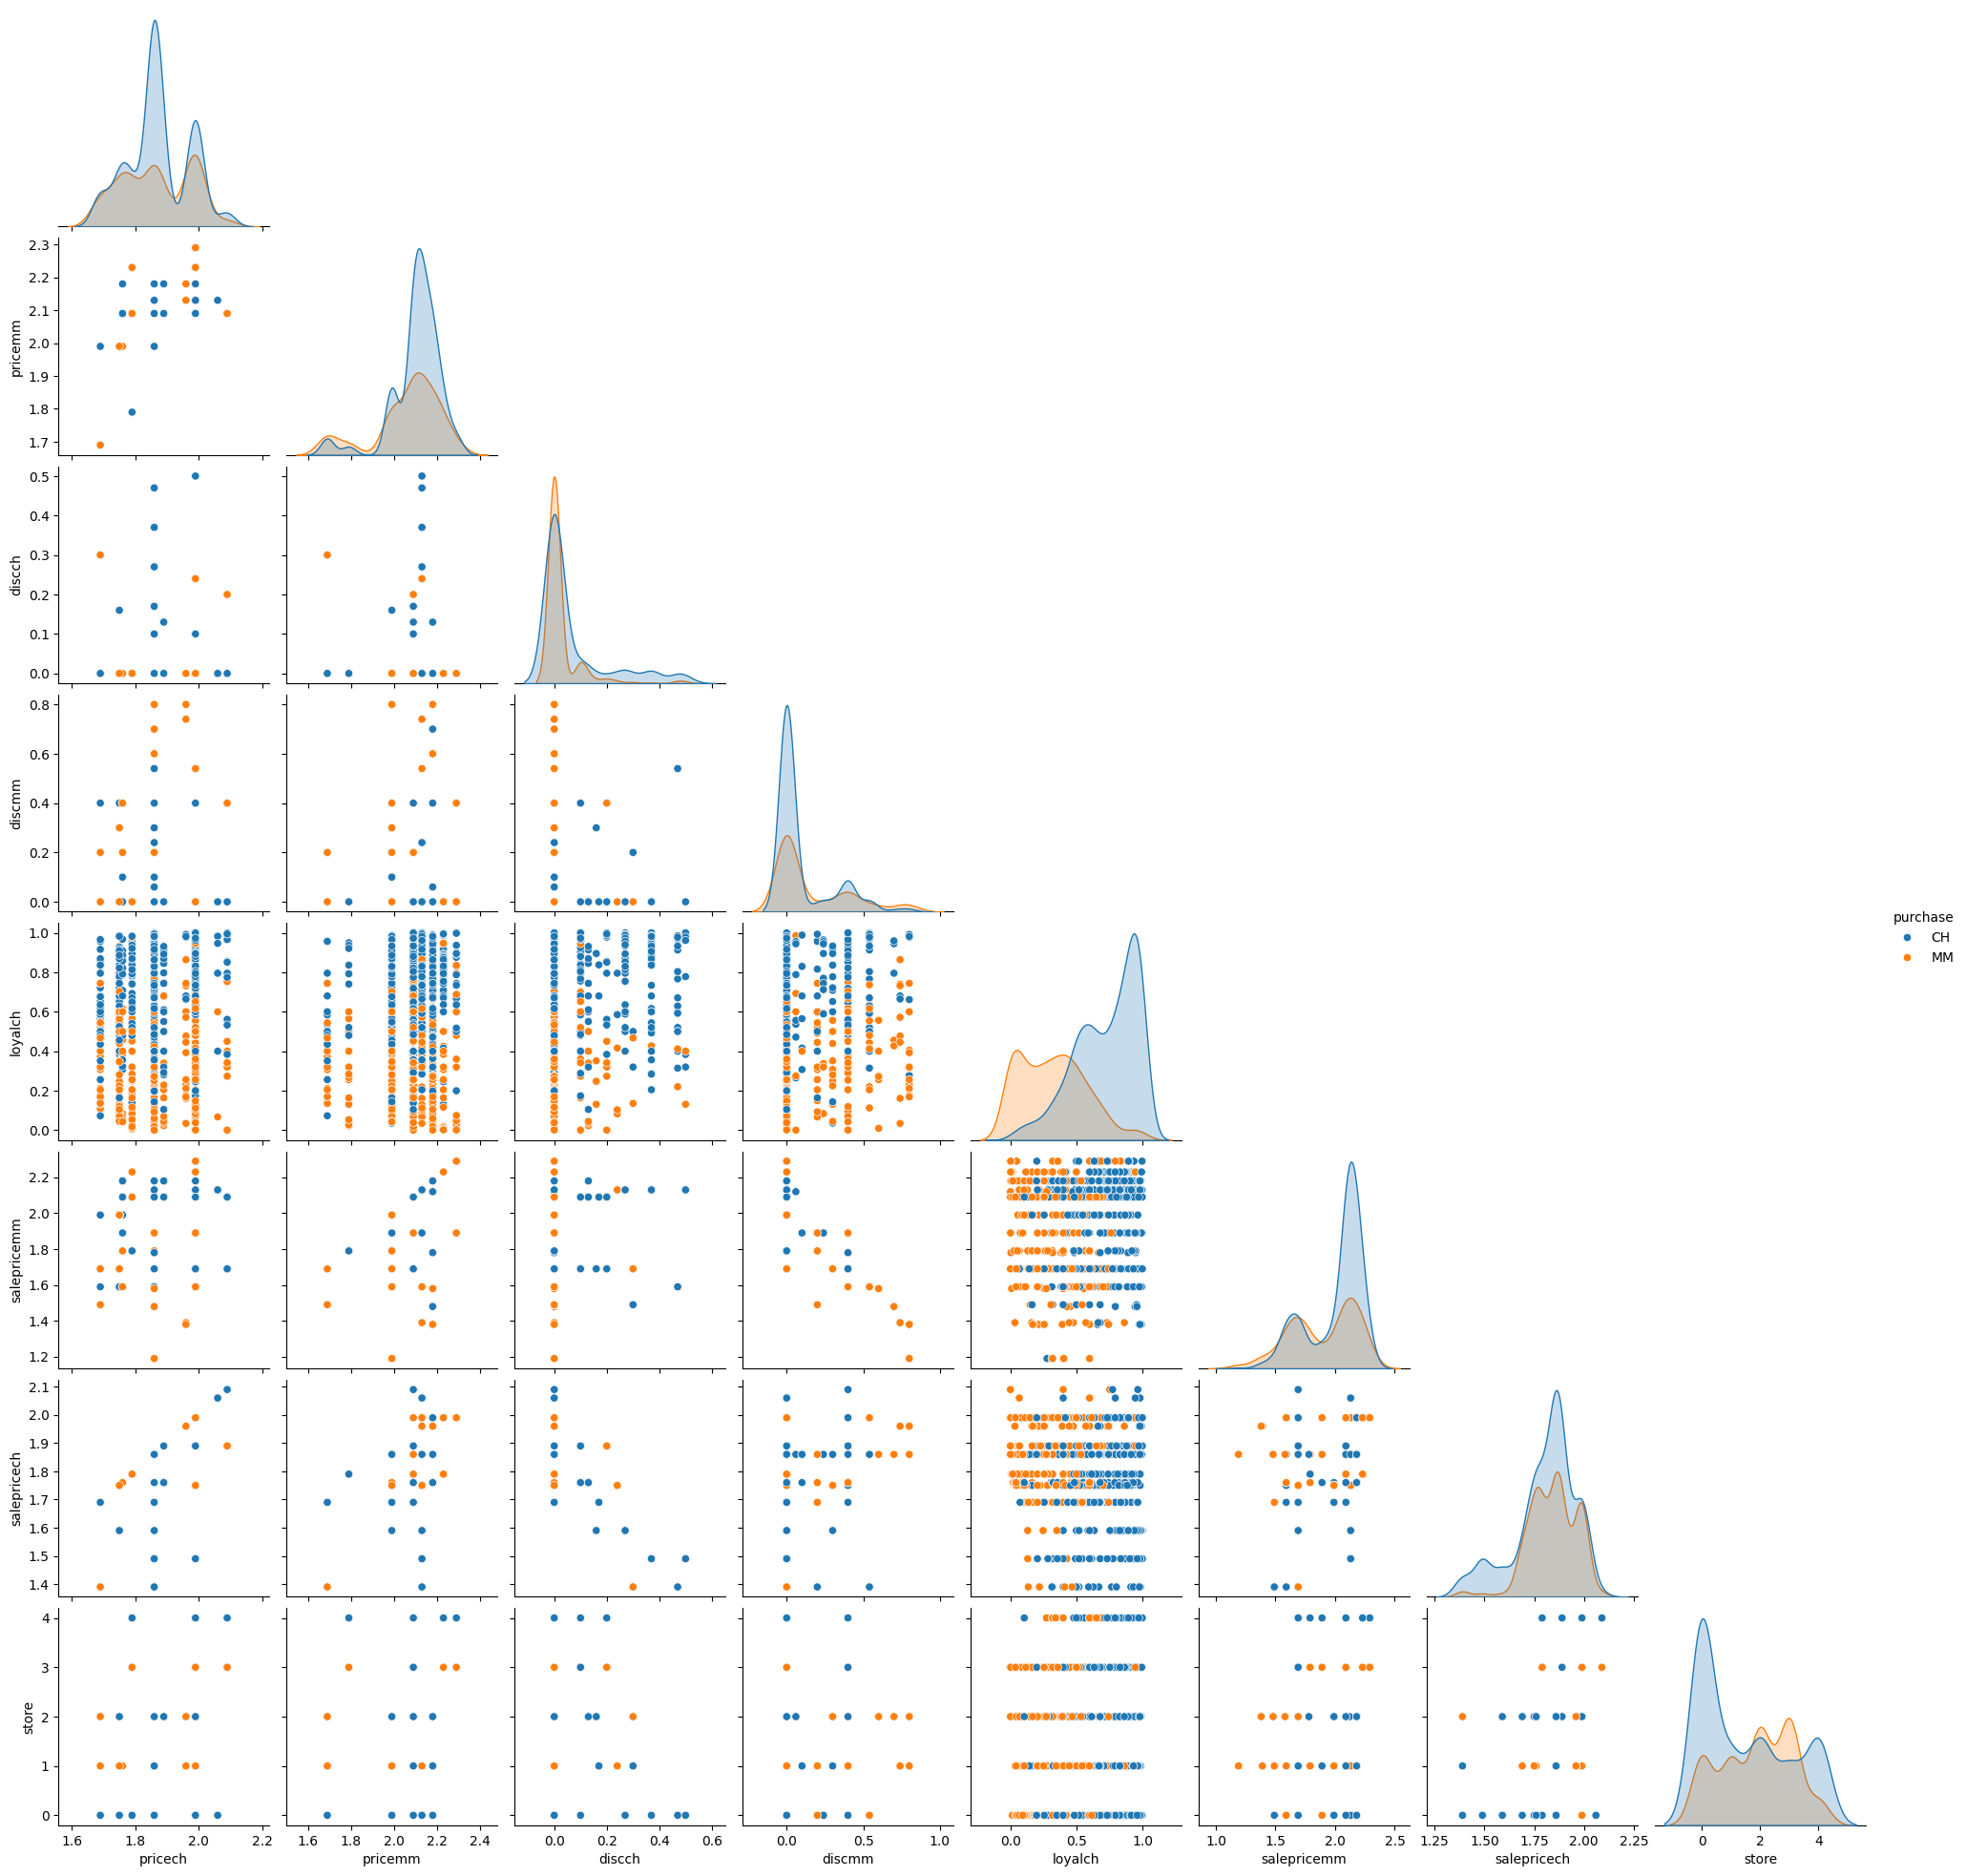

In [ ]:
sns.pairplot(df_train, corner=True, hue='purchase', diag_kind='kde')
plt.show()

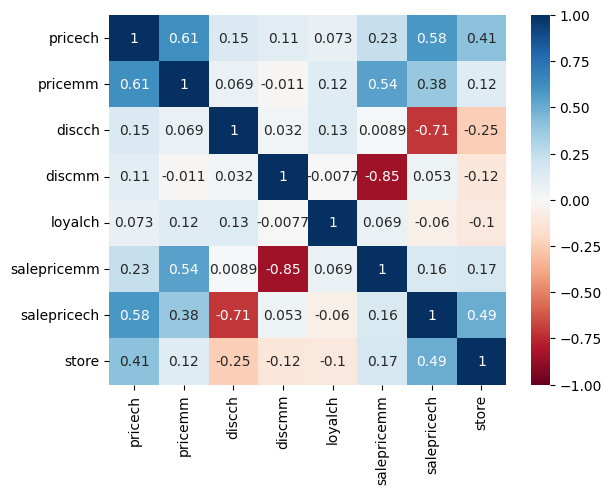

In [ ]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [ ]:
#Step 4. DP
X_train = df_train.drop(columns=['purchase'])
y_train = df_train['purchase']

X_test = df_test.drop(columns=['purchase'])
y_test = df_test['purchase']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((963, 12), (963,), (107, 12), (107,))

In [ ]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [ ]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])
cat_proc = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('ohencoder', OneHotEncoder())
])
processor = ColumnTransformer([
    ('num',num_proc,num_cols),
    ('cat', cat_proc,cat_cols)
])
clf_ppl = Pipeline(steps=[
    ('proc',processor)
])

In [ ]:
X_train_transform = clf_ppl.fit_transform(X_train)

In [ ]:
X_train_df = pd.DataFrame(X_train_transform)
X_train_df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_transform.shape[1],)), #Capa de entrada de datos
    tf.keras.layers.Dense(32, activation='relu'), #Capa de procesamiento
    tf.keras.layers.Dense(16, activation='relu'), #Capa de procesamiento
    tf.keras.layers.Dense(8, activation='relu'), #Capa de procesamiento
    tf.keras.layers.Dense(1, activation='sigmoid') #Capa variable de salida
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #Compilacion del modelo

In [ ]:
history = model.fit(
    X_train_transform, y_train_enc,
    epochs=4, batch_size=32,
    validation_split=0.15
    )

Epoch 1/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5045 - loss: 0.6985 - val_accuracy: 0.7448 - val_loss: 0.6668
Epoch 2/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 0.6512 - val_accuracy: 0.7793 - val_loss: 0.5716
Epoch 3/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7961 - loss: 0.5312 - val_accuracy: 0.8138 - val_loss: 0.4239
Epoch 4/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8075 - loss: 0.4276 - val_accuracy: 0.8069 - val_loss: 0.4029


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

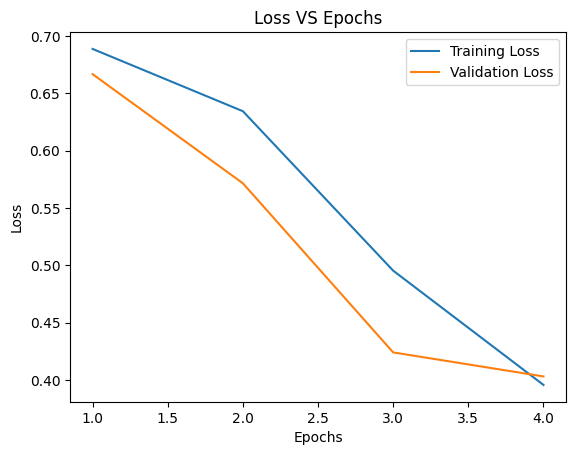

In [ ]:
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Loss VS Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

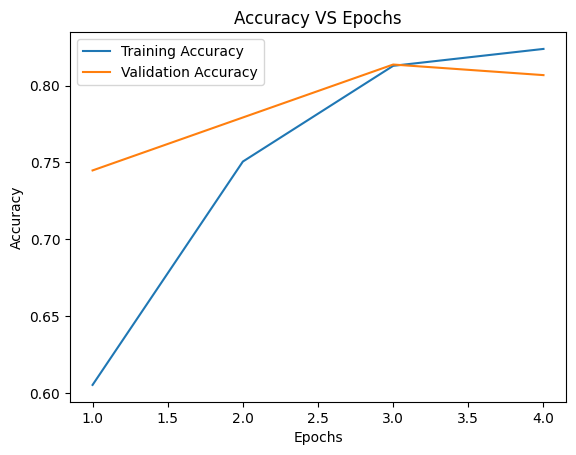

In [ ]:
plt.plot(epochs, accuracy, label="Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.title("Accuracy VS Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
X_test_transform = clf_ppl.transform(X_test)

In [ ]:
loss, accuracy = model.evaluate(X_test_transform, y_test_enc)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8627 - loss: 0.3306 
Test Accuracy: 0.86
